In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# *Loading the Dataset*

In [7]:
df_test = pd.read_csv(r'C:\Users\Varshini\Desktop\ML\test_data.txt', sep=":::", header = 0 , engine = 'python')

In [8]:
df_train = pd.read_csv(r'C:\Users\Varshini\Desktop\ML\train_data.txt', sep=":::", header = 0 , engine = 'python')

In [9]:
df_train.columns = ['S.No', 'Movie_Name', 'Category', 'Confession']
df_test.columns = ['S.No', 'Movie_Name' , 'Confession']

In [10]:
df_train.head()

,S.No,Movie_Name,Category,Confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [11]:
df_test.head()

,S.No,Movie_Name,Confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...


In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   S.No        54213 non-null  int64 
 1   Movie_Name  54213 non-null  object
 2   Category    54213 non-null  object
 3   Confession  54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   S.No        54199 non-null  int64 
 1   Movie_Name  54199 non-null  object
 2   Confession  54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [14]:
df_train.describe()

,S.No
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [16]:
df_test.describe()

,S.No
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [17]:
df_train.count()

S.No          54213
Movie_Name    54213
Category      54213
Confession    54213
dtype: int64

In [18]:
df_test.count()

S.No          54199
Movie_Name    54199
Confession    54199
dtype: int64

In [28]:
print(df_train['Category'].value_counts())

Category
drama           13612
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64


In [19]:
df_train.isnull().sum()

S.No          0
Movie_Name    0
Category      0
Confession    0
dtype: int64

In [20]:
df_test.isnull().sum()

S.No          0
Movie_Name    0
Confession    0
dtype: int64

In [21]:
df_train.shape

(54213, 4)

In [22]:
df_test.shape

(54199, 3)

In [23]:
df_train.iloc[0:3]

,S.No,Movie_Name,Category,Confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [24]:
df_test.iloc[0:3]

,S.No,Movie_Name,Confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."


# *Load the test data Solution*

In [27]:
test_data_solution = pd.read_csv(r'C:\Users\Varshini\Desktop\ML\test_data_solution.txt', delimiter=':::', engine='python', names=['S.No', 'Movie_Name', 'Category', 'Confession'])
test_data_solution

,S.No,Movie_Name,Category,Confession
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)",horror,"Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),western,As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),adult,A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),drama,"Popular, but mysterious rock D.J Mike Mallard..."


# *Data Visualization* 

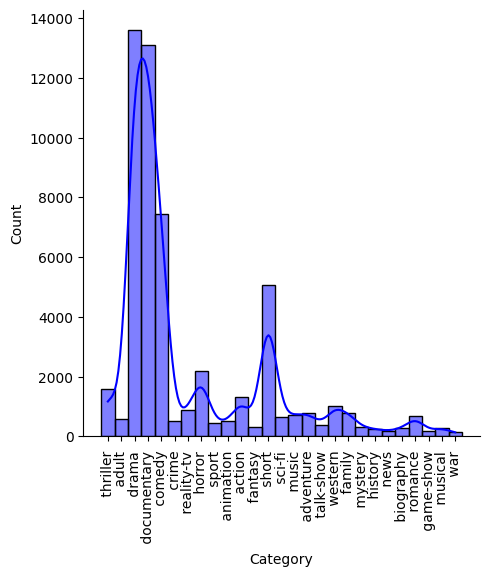

In [37]:
sns.displot(df_train.Category, kde =True, color = "blue")
plt.xticks(rotation=90);

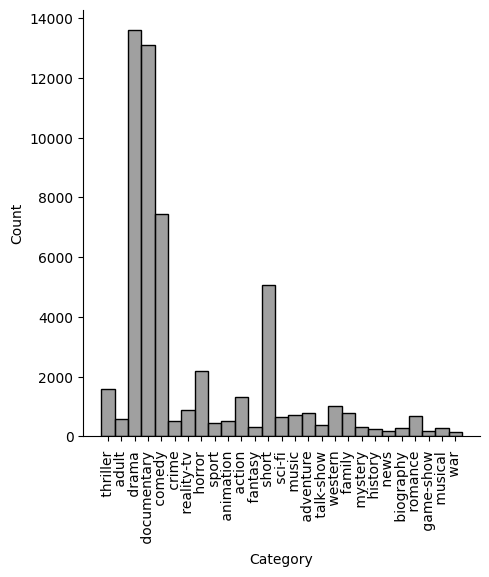

In [38]:
sns.displot(df_train.Category, kde=False, color = "grey")
plt.xticks(rotation=90);

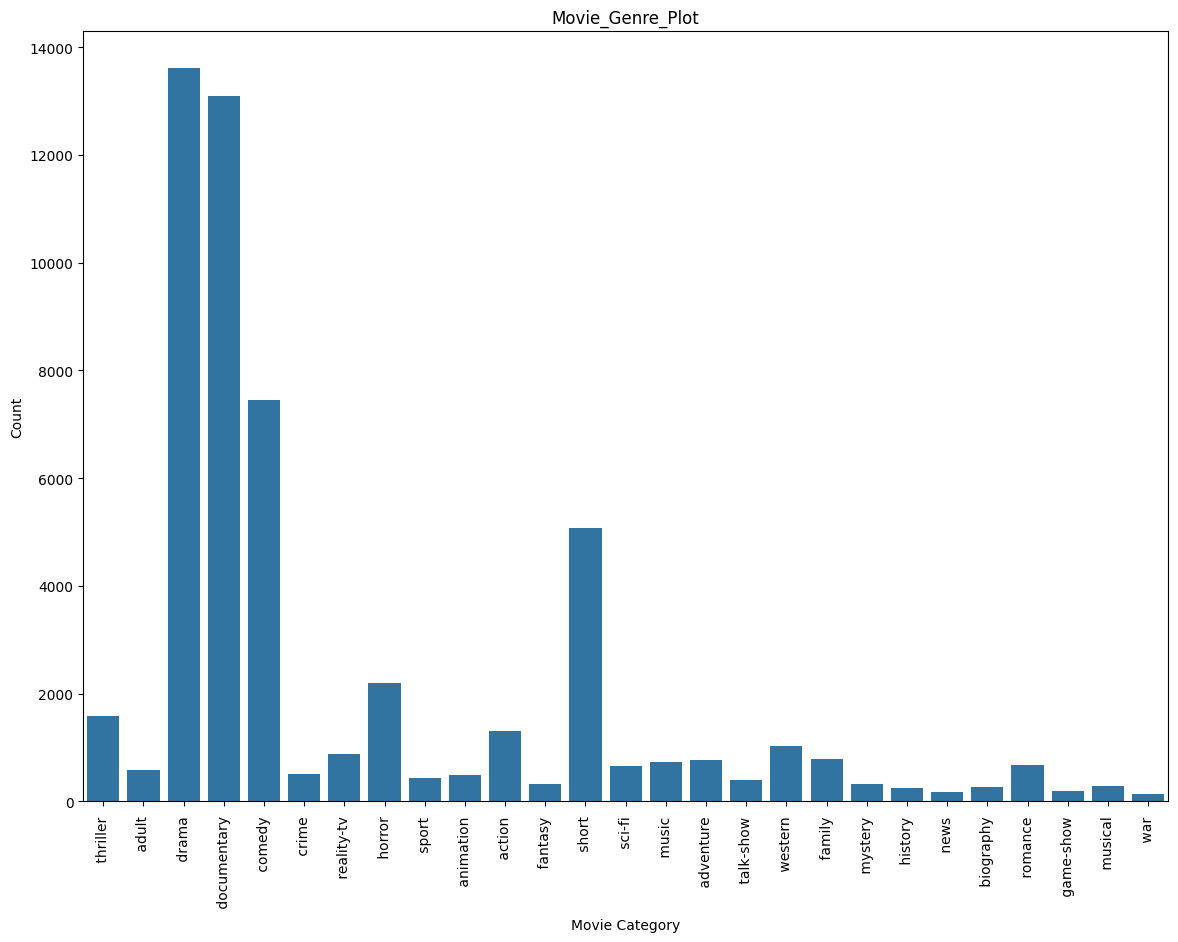

In [39]:
plt.figure(figsize=(14,10))
sns.countplot(x='Category', data=df_train)
plt.xlabel('Movie Category')
plt.ylabel('Count')
plt.title('Movie_Genre_Plot')
plt.xticks(rotation=90);
plt.show()

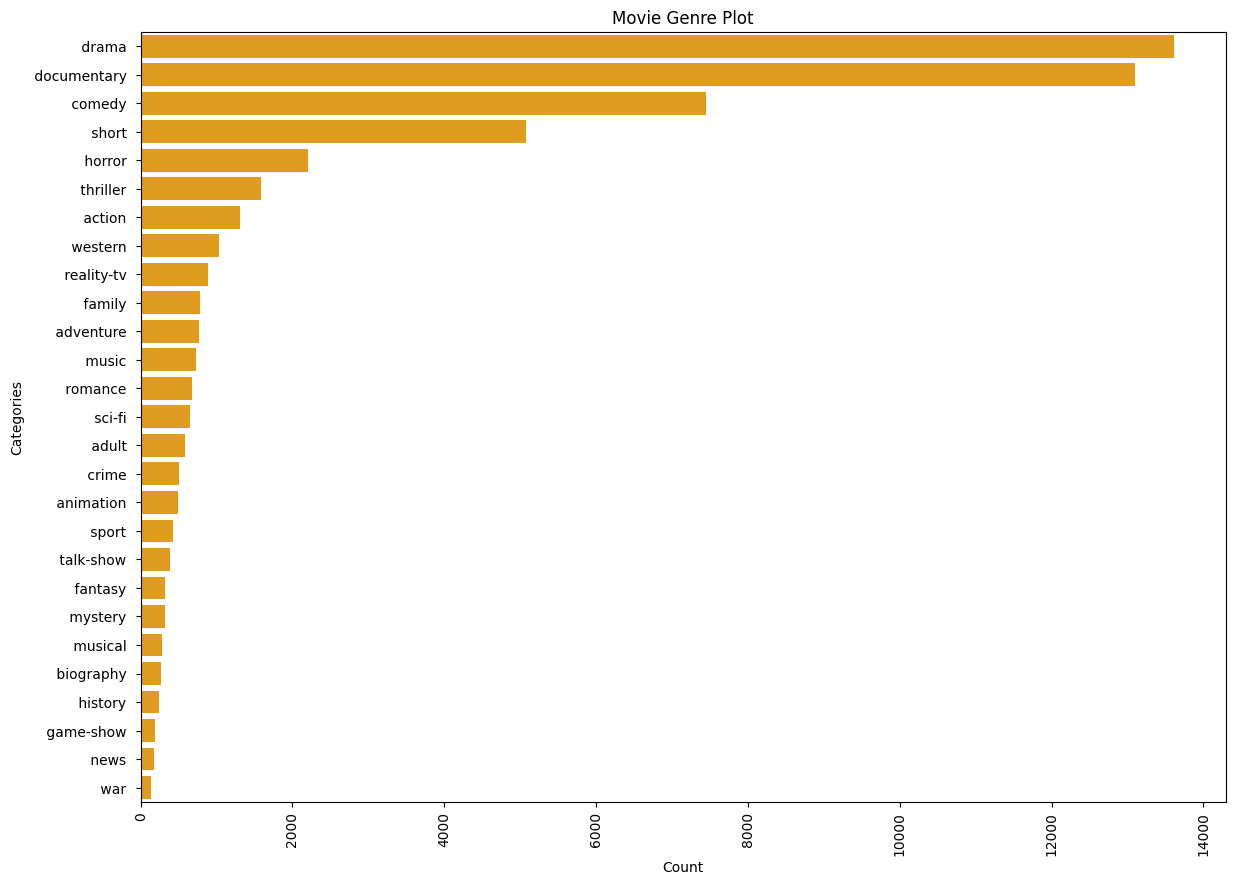

In [40]:
plt.figure(figsize = (14,10))
count1 = df_train.Category.value_counts()
sns.barplot(x = count1, y = count1.index, orient = 'h', color='orange')
plt.xlabel('Count')
plt.ylabel('Categories')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90)
plt.show()

In [29]:
unique_genres=df_train['Category'].unique()
unique_genres

array([' thriller ', ' adult ', ' drama ', ' documentary ', ' comedy ',
       ' crime ', ' reality-tv ', ' horror ', ' sport ', ' animation ',
       ' action ', ' fantasy ', ' short ', ' sci-fi ', ' music ',
       ' adventure ', ' talk-show ', ' western ', ' family ', ' mystery ',
       ' history ', ' news ', ' biography ', ' romance ', ' game-show ',
       ' musical ', ' war '], dtype=object)

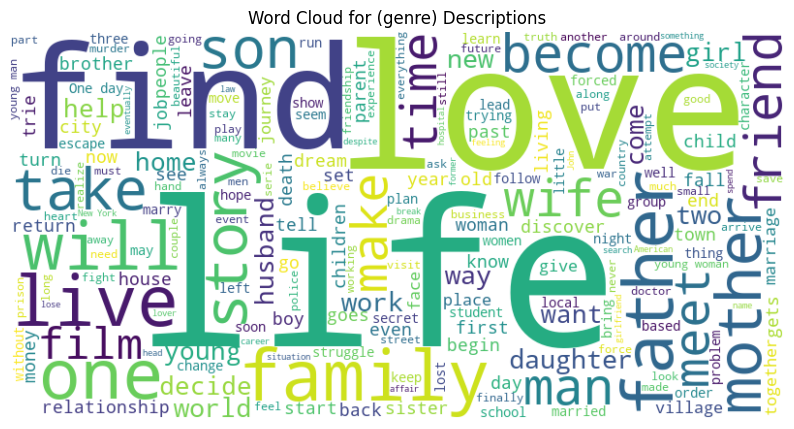

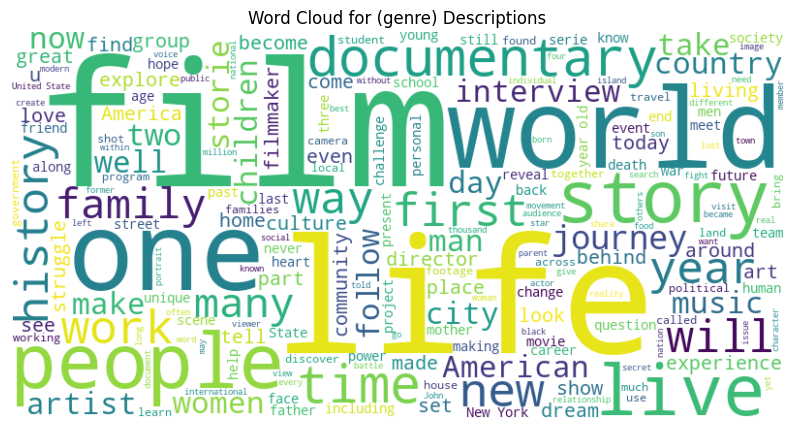

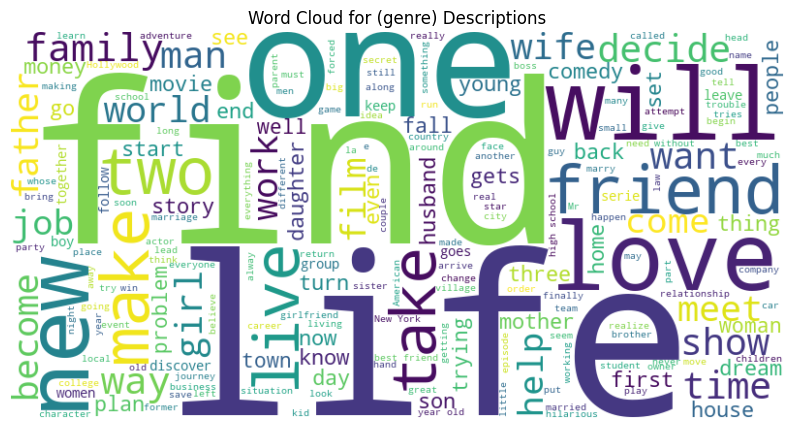

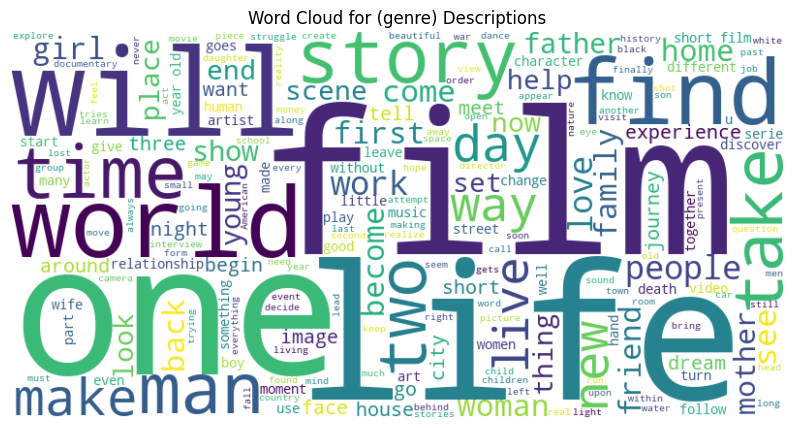

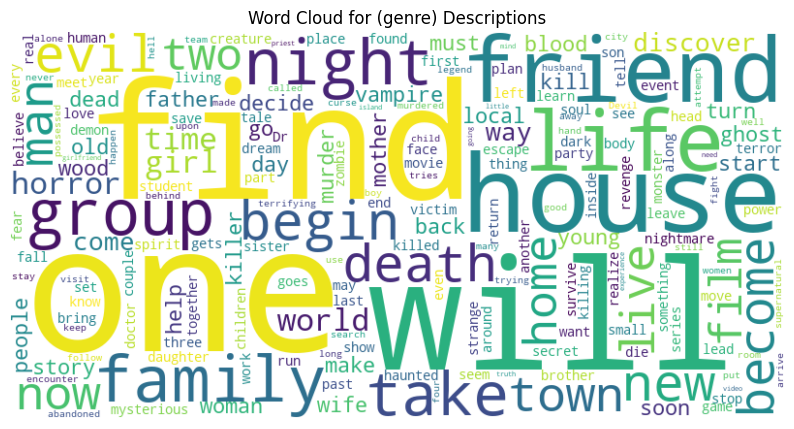

In [41]:

from wordcloud import WordCloud
# Identify the top 5 most frequent genres.
top_genres=df_train['Category'].value_counts().head (5).index
# Generate word clouds for each of the top 5 genres
for genre in top_genres:
    subset=df_train[df_train['Category'] == genre]
    wordcloud = WordCloud (width=800, height=400, background_color='white').generate(' '.join(subset ['Confession']))
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for (genre) Descriptions')
    plt.show()


C:\Users\Varshini\AppData\Local\Temp\ipykernel_17192\3359921231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Category', data=df_train, palette='Set2')


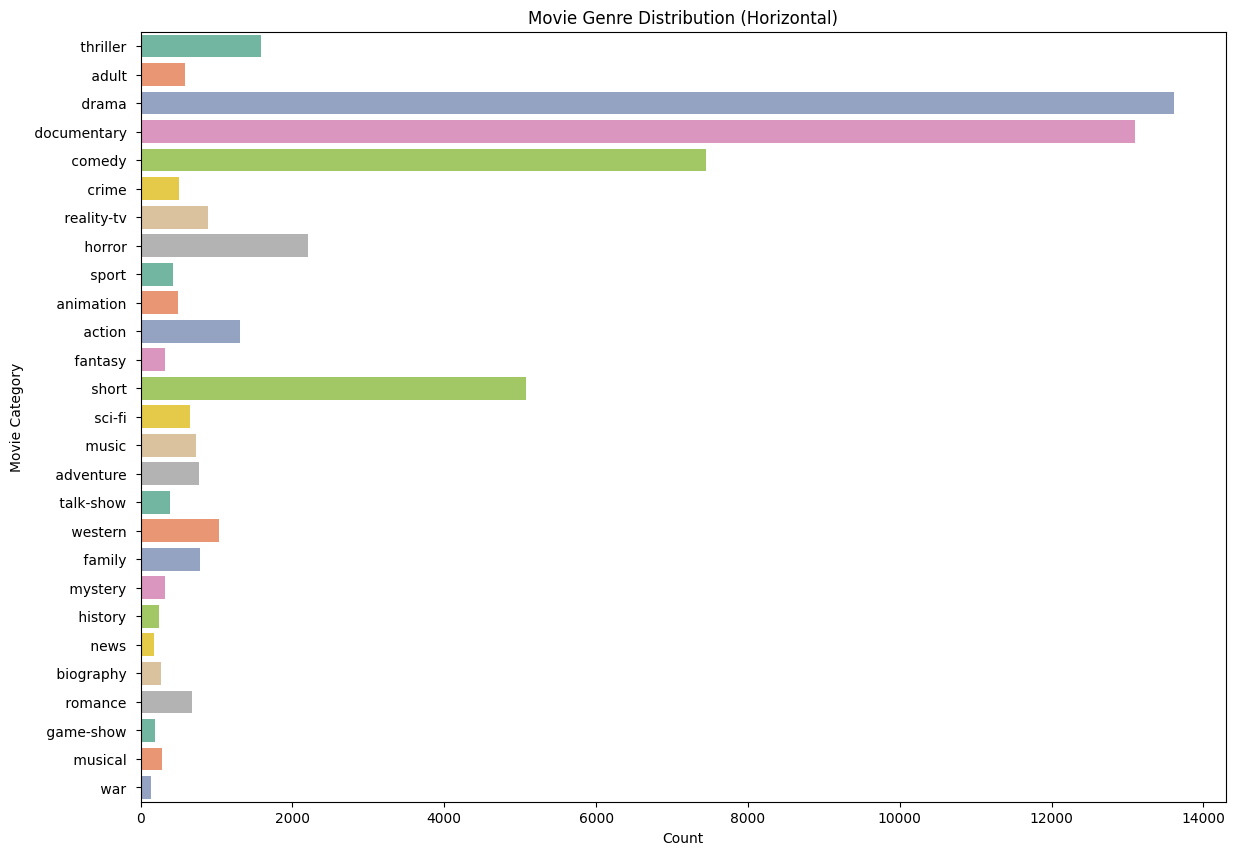

In [42]:
plt.figure(figsize=(14,10))
sns.countplot(y='Category', data=df_train, palette='Set2') 
plt.xlabel('Count')
plt.ylabel('Movie Category')
plt.title('Movie Genre Distribution (Horizontal)')
plt.show()

In [43]:
df_combined = pd.concat([df_train, df_test], axis = 0)

In [44]:
df_combined.head()

,S.No,Movie_Name,Category,Confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...


In [45]:
df_combined.shape

(108412, 4)

In [46]:
df_combined.size

433648

In [47]:
df_combined.isnull().any()

S.No          False
Movie_Name    False
Category       True
Confession    False
dtype: bool

In [48]:
df_combined.count()

S.No          108412
Movie_Name    108412
Category       54213
Confession    108412
dtype: int64

In [49]:
encoder = LabelEncoder()
df_combined["Category"] = encoder.fit_transform(df_combined["Category"].values)

In [50]:
encoder = LabelEncoder()
df_combined["Movie_Name"] = encoder.fit_transform(df_combined["Movie_Name"].values)

In [51]:
df_combined.head()

,S.No,Movie_Name,Category,Confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [52]:
df_combined.Category = df_combined.Category.fillna(df_combined.Category.mean())

In [53]:
df_combined.count()

S.No          108412
Movie_Name    108412
Category      108412
Confession    108412
dtype: int64

In [54]:
df_combined.duplicated().values.any()

np.False_

# *Preprocess the Data*

In [55]:
vectorizer = TfidfVectorizer()

In [56]:
X = vectorizer.fit_transform(df_combined["Confession"])

In [57]:
df_combined.head()

,S.No,Movie_Name,Category,Confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [58]:
y = df_combined["Category"]

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# *Train Navie Bayes Classifier*

In [60]:
naive_bayes_model = MultinomialNB()

In [61]:
naive_bayes_model.fit(X_train, y_train)

MultinomialNB()

In [62]:
nb_predictions = naive_bayes_model.predict(X_test)

In [63]:
from sklearn.metrics import classification_report
print("Naive Bayes Model:")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions, zero_division=0))  
print("Accuracy: ", accuracy_score(y_test, nb_predictions))
print("r2_Score: ", r2_score(y_test, nb_predictions))


Naive Bayes Model:
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   256]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   127]
 [    0     0     0     0     0     1     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   145]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    91]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0    42]
 [    0     0     0     0     0    18     0     0     1     0     0     0
      0     0     0     0     0 

In [64]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, nb_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, nb_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, nb_predictions, average='weighted', zero_division=0)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)


Precision:  0.4095746261222732
Recall:  0.49370474565327677
F1 Score:  0.3291765353331977


# *Train Logistic Regression Model*

In [65]:
logistic_regression_model = LogisticRegression()

In [66]:
logistic_regression_model.fit(X_train, y_train)

C:\Users\Varshini\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
lr_predictions = logistic_regression_model.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, r2_score
print("Logistic Regression Model:")
print(confusion_matrix(y_test, lr_predictions))
print(classification_report(y_test, lr_predictions, zero_division=0))
print("Accuracy: ", accuracy_score(y_test, lr_predictions))
print("r2_Score: ", r2_score(y_test, lr_predictions))


Logistic Regression Model:
[[   2    0    0    0    0    0    0    0    2    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0  251]
 [   0    3    0    0    0    2    0    0    1    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  121]
 [   0    1    0    0    0    1    0    1    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0  143]
 [   0    0    0    0    0    1    0    0    2    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0   87]
 [   0    0    0    0    0    0    0    3    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0   39]
 [   0    0    0    0    0  102    0    1   17    0    0    0    0    1
     0    0    0    0    0    0    0    0    0    0    0    0    0 1367]
 [   0    0    0    0    0    1    0    0    2    0    0    0    0    0
     0    0    0    0    0    0

In [69]:
precision = precision_score(y_test, lr_predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, lr_predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, lr_predictions, average='weighted', zero_division=0)
print("Logistic Regression Model:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Logistic Regression Model:
Precision: 0.43829776457242353
Recall: 0.48969238573998064
F1 Score: 0.3893234069190745


In [70]:
from sklearn.svm import LinearSVC
svc_model=LinearSVC()
svc_model.fit(X_train, y_train)

LinearSVC()

# *Prediction of Movie Genres using Classifiers*

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

data = {
    'Movie_Name': ['Movie1', 'Movie2', 'Movie3', 'Movie4'],
    'Category': ['drama', 'thriller', 'comedy', 'drama'],
    'Confession': ['A dramatic tale', 'A thrilling adventure', 'A funny comedy', 'A sad drama']
}

import pandas as pd
df = pd.DataFrame(data)

X = df['Confession']
y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train_tfidf, y_train)
lr_predictions = lr_model.predict(X_test_tfidf)

nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
nb_predictions = nb_model.predict(X_test_tfidf)

print("Logistic Regression Model:")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:\n", classification_report(y_test, lr_predictions, zero_division=0))

print("Naive Bayes Model:")
print("Accuracy:", accuracy_score(y_test, nb_predictions))
print("Classification Report:\n", classification_report(y_test, nb_predictions, zero_division=0))

new_movie = ["A mysterious adventure unfolds in the city."]
new_movie_vectorized = vectorizer.transform(new_movie)

lr_new_movie_pred = lr_model.predict(new_movie_vectorized)
nb_new_movie_pred = nb_model.predict(new_movie_vectorized)

print("Predicted Genre using Logistic Regression:", lr_new_movie_pred[0])
print("Predicted Genre using Naive Bayes:", nb_new_movie_pred[0])


Logistic Regression Model:
Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

       drama       0.00      0.00      0.00       0.0
    thriller       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Naive Bayes Model:
Accuracy: 0.0
Classification Report:
               precision    recall  f1-score   support

       drama       0.00      0.00      0.00       0.0
    thriller       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Predicted Genre using Logistic Regression: drama
Predicted Genre using Naive Bayes: drama


In [1]:
import pickle

# Save the Naive Bayes model
with open('naive_bayes_model.pkl', 'wb') as model_file:
    pickle.dump(naive_bayes_model, model_file)

# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

# Save the encoder
with open('encoder.pkl', 'wb') as encoder_file:
    pickle.dump(encoder, encoder_file)


NameError: name 'naive_bayes_model' is not defined